# Лабораторная работа №3 по курсу "Методы машинного обучения"

# **ИУ5-21М Данилин М.С.**

- **Цель лабораторной работы**: изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

# Задание

- Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    - масштабирование признаков (не менее чем тремя способами);
    - обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
    - обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
    - отбор признаков:
        - один метод из группы методов фильтрации (filter methods);
        - один метод из группы методов обертывания (wrapper methods);
        - один метод из группы методов вложений (embedded methods).

# Подключение библиотек

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import _california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import re

# Ход работы

## Загрузка и предобработка данных

In [ ]:
california_ds = _california_housing.fetch_california_housing()
data = pd.DataFrame(california_ds.data,
                      columns=california_ds.feature_names)
data['Y'] = california_ds.target
data.shape

(20640, 9)

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((16512, 8), (4128, 8))

## Масштабирование признаков
(не менее чем тремя способами);

- **Масштабирование** - это изменение диапазона измерения признака с целью улучшения качества построения модели.

### Масштабирование данных на основе Z-оценки

$$ x' = \frac{x - \mu(x) }{\sigma(x)} $$

где $x$ - признак, $\mu(x)=mean(x)$ - среднее значение, $\sigma(x)=std(x)$ - среднеквадратичное отклонение.

Особенности метода:
- Среднее значение приводится к 0.
- Среднеквадратичное отклонение приводится к 1.
- Форма исходного распределения сохраняется.
- Максимальные и минимальные значения могут варьироваться.
- Выбросы сохраняются.

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [ ]:
data_cs11_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

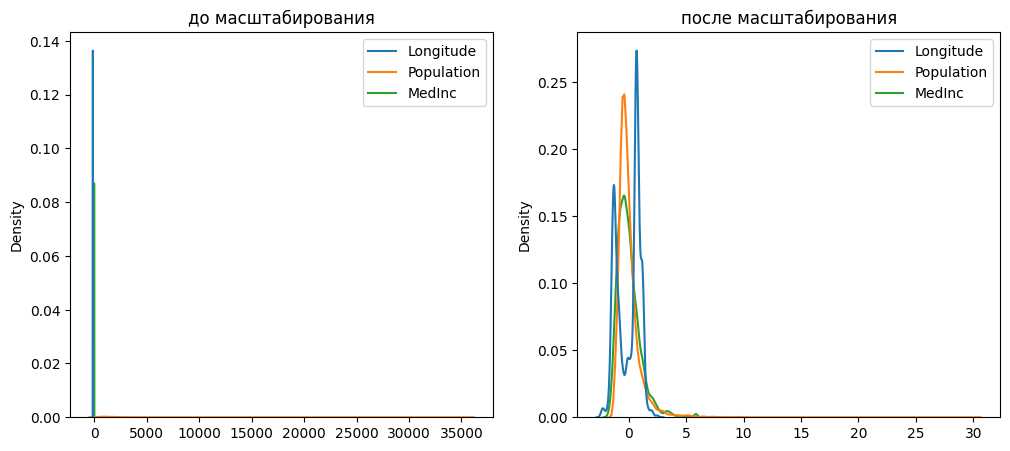

In [ ]:
draw_kde(['Longitude', 'Population', 'MedInc'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [ ]:
# Обучаем StandardScaler на обучающей выборке
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [ ]:
data_cs12_scaled_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-1.663183e-16,5.239134e-17,1.912768e-16,2.119321e-16,2.280691e-17,1.183377e-18,3.050962e-16,-1.818528e-15
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.784934e+00,-2.193326e+00,-1.758064e+00,-1.510898e+00,-1.265666e+00,-2.022041e-01,-1.446964e+00,-2.354008e+00
25%,-6.894428e-01,-8.425832e-01,-3.830692e-01,-1.840409e-01,-5.688744e-01,-5.757397e-02,-7.965259e-01,-1.113670e+00
50%,-1.753078e-01,3.142707e-02,-8.210226e-02,-1.001681e-01,-2.324925e-01,-2.427528e-02,-6.421054e-01,5.401142e-01
75%,4.619818e-01,6.670709e-01,2.359401e-01,-4.655013e-05,2.649611e-01,1.542318e-02,9.722905e-01,7.792156e-01
max,5.880939e+00,1.858903e+00,5.221361e+01,6.500353e+01,3.048505e+01,1.069443e+02,2.956360e+00,2.622289e+00


In [ ]:
data_cs12_scaled_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.014481,0.013911,-0.023175,-0.028812,0.000977,-0.010484,-0.000777,0.011417
std,1.021662,0.999880,0.692871,0.604269,1.038310,0.100045,0.997493,0.989980
min,-1.784934,-2.113871,-1.521001,-1.428741,-1.258546,-0.207179,-1.437605,-2.378915
25%,-0.712242,-0.842583,-0.381876,-0.186036,-0.564647,-0.056193,-0.791846,-1.058876
50%,-0.198860,0.031427,-0.076683,-0.101062,-0.220479,-0.021970,-0.642105,0.530152
75%,0.451514,0.667071,0.224293,-0.000800,0.271190,0.019040,0.976970,0.784197
max,5.880939,1.858903,17.369108,18.082473,24.152526,4.165286,2.914245,2.502738


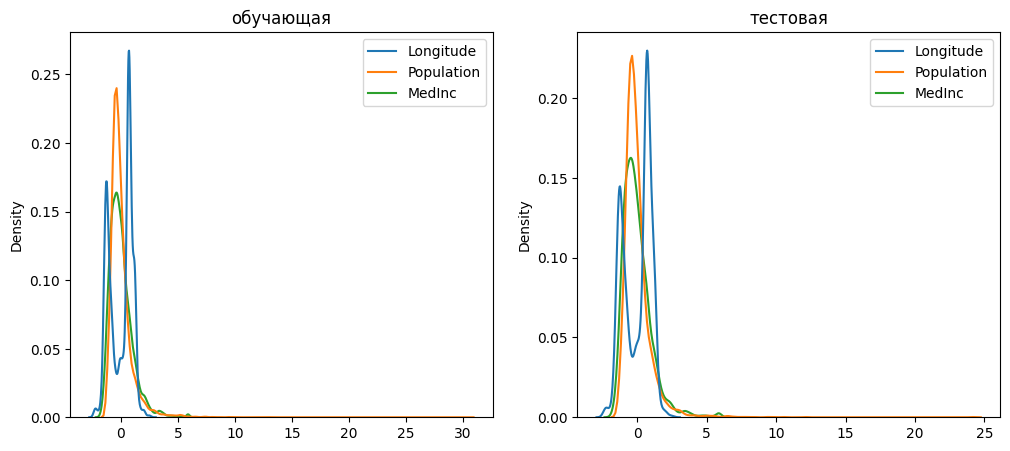

In [ ]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['Longitude', 'Population', 'MedInc'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Масштабирование "Mean Normalisation"

$$ x' = \frac{x - \mu(x) }{max(x)-min(x)} $$

где $x$ - признак, $\mu(x)=mean(x)$ - среднее значение.

Особенности метода:
- Среднее значение приводится к 0.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения в диапазоне [-1;1].
- Выбросы сохраняются.

In [ ]:
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [ ]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-0.000378,0.000687,-0.000086,-0.000087,0.000006,-0.000020,-0.000035,0.000459
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.200554
min,-0.232842,-0.541264,-0.032574,-0.022715,-0.039863,-0.001934,-0.328607,-0.478049
25%,-0.090533,-0.207931,-0.007092,-0.002772,-0.017889,-0.000535,-0.180892,-0.222794
50%,-0.023541,0.007756,-0.001503,-0.001506,-0.007266,-0.000223,-0.145823,0.108537
75%,0.059799,0.164618,0.004333,-0.000002,0.008401,0.000151,0.220808,0.156585
max,0.767158,0.458736,0.967426,0.977285,0.960137,0.998113,0.671393,0.526956


In [ ]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [ ]:
data_cs22_scaled_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-2.183869e-17,1.328610e-17,3.477852e-18,3.187050e-18,7.732295e-19,1.197665e-20,6.928136e-17,-3.649105e-16
std,1.304522e-01,2.467852e-01,1.852880e-02,1.503479e-02,3.149631e-02,9.333299e-03,2.271081e-01,2.009587e-01
min,-2.328416e-01,-5.412641e-01,-3.257383e-02,-2.271534e-02,-3.986258e-02,-1.887174e-03,-3.286072e-01,-4.730442e-01
25%,-8.993664e-02,-2.079308e-01,-7.097596e-03,-2.766932e-03,-1.791690e-02,-5.373388e-04,-1.808920e-01,-2.237950e-01
50%,-2.286860e-02,7.755500e-03,-1.521210e-03,-1.505960e-03,-7.322435e-03,-2.265616e-04,-1.458229e-01,1.085374e-01
75%,6.026474e-02,1.646182e-01,4.371553e-03,-6.998501e-07,8.345045e-03,1.439448e-04,2.208083e-01,1.565854e-01
max,7.671584e-01,4.587359e-01,9.674262e-01,9.772847e-01,9.601374e-01,9.981128e-01,6.713928e-01,5.269558e-01


In [ ]:
data_cs22_scaled_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.001889,0.003433,-0.000429,-0.000433,0.000031,-0.000098,-0.000176,0.002294
std,0.133274,0.246748,0.012838,0.009085,0.032702,0.000934,0.226532,0.198939
min,-0.232842,-0.521656,-0.028181,-0.021480,-0.039638,-0.001934,-0.326482,-0.478049
25%,-0.092911,-0.207931,-0.007075,-0.002797,-0.017784,-0.000524,-0.179829,-0.212784
50%,-0.025941,0.007756,-0.001421,-0.001519,-0.006944,-0.000205,-0.145823,0.106535
75%,0.058899,0.164618,0.004156,-0.000012,0.008541,0.000178,0.221871,0.157586
max,0.767158,0.458736,0.321819,0.271858,0.760692,0.038875,0.661829,0.502932


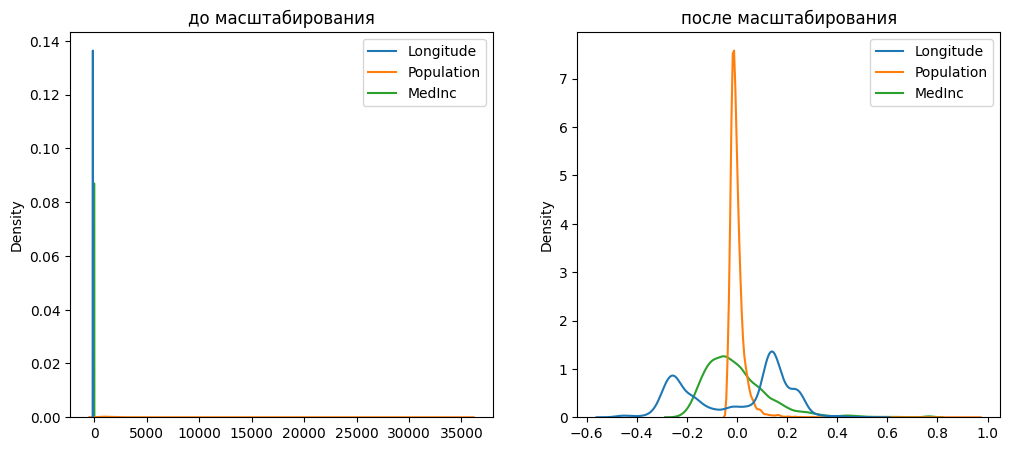

In [ ]:
draw_kde(['Longitude', 'Population', 'MedInc'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

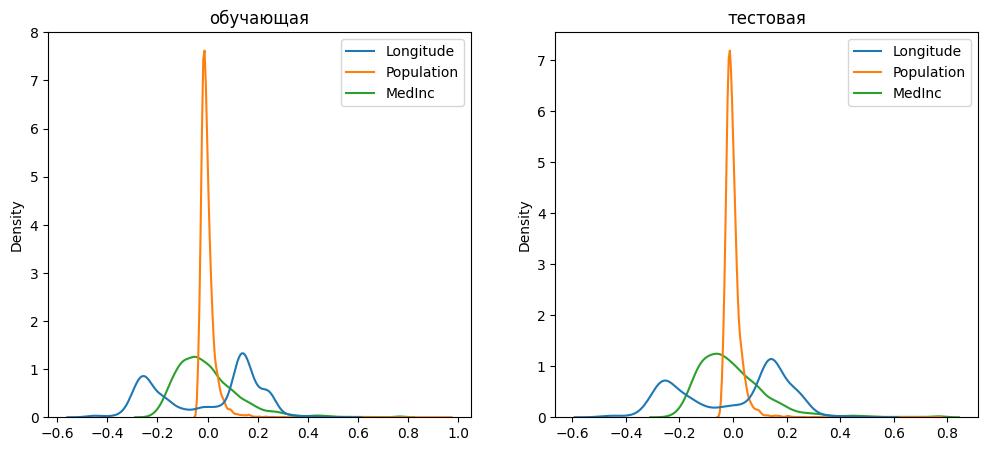

In [ ]:
draw_kde(['Longitude', 'Population', 'MedInc'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax-масштабирование

$$ x' = \frac{x - min(x)}{max(x)-min(x)} $$

Особенности метода:
- Среднее значение может варьироваться.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения в диапазоне [0;1].
- Выбросы сохраняются.

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

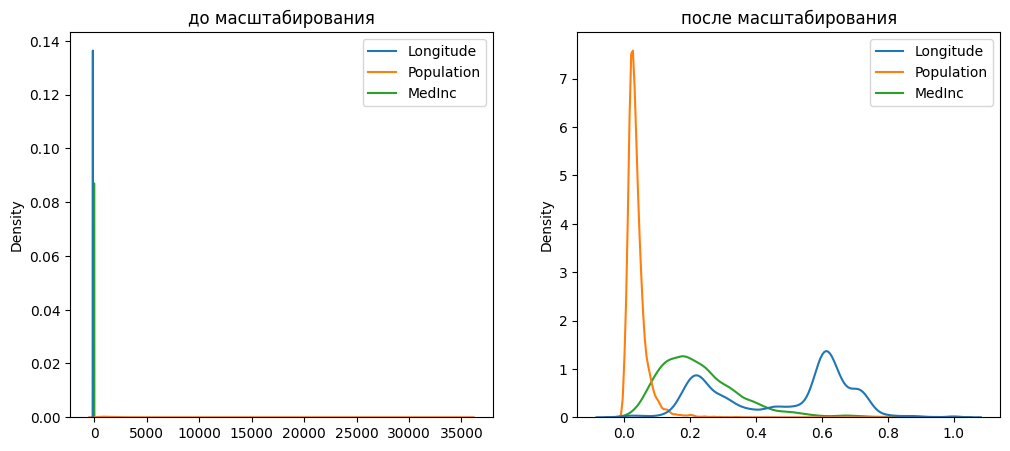

In [ ]:
draw_kde(['Longitude', 'Population', 'MedInc'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

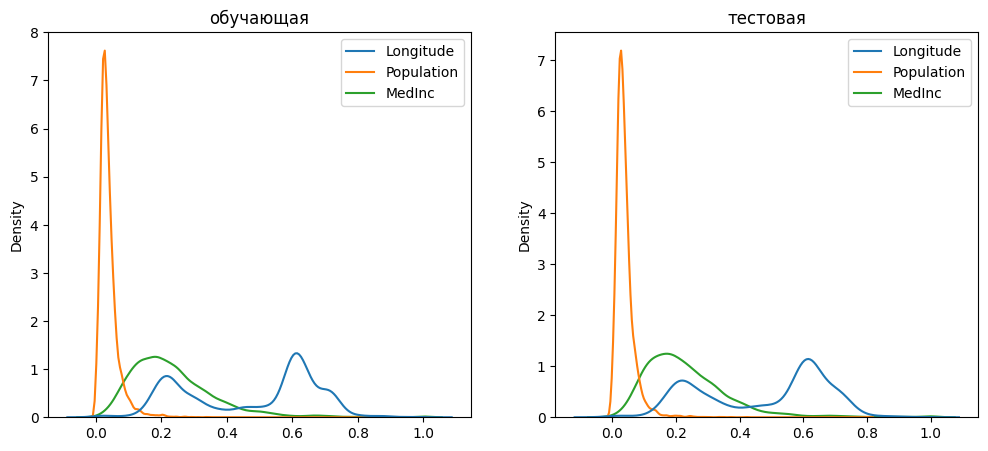

In [ ]:
draw_kde(['Longitude', 'Population', 'MedInc'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

## Обработка выбросов для числовых признаков
(по одному способу для удаления выбросов и для замены выбросов);

**Почему необходимо устранять выбросы?** Выбросы негативно влияют на построение модели.  

**Причины появления выбросов:**
- Ошибки в измерениях, например, часть значений признака "расстояние" была измерена не в километрах, а в метрах.
- Технические ошибки форматирования данных.

**Основные задачи обработки выбросов:**
- Обнаружение выбросов.
- Устранение (удаление или замена) выбросов (в зависимости от требований задачи).

### Подгрузка библиотек и просмотр датасета

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

In [ ]:
x_col_list = ['Longitude', 'Population', 'MedInc']

In [ ]:
data = pd.DataFrame(california_ds.data,
                      columns=california_ds.feature_names)[x_col_list]
data['Y'] = california_ds.target
data.shape

(20640, 4)

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

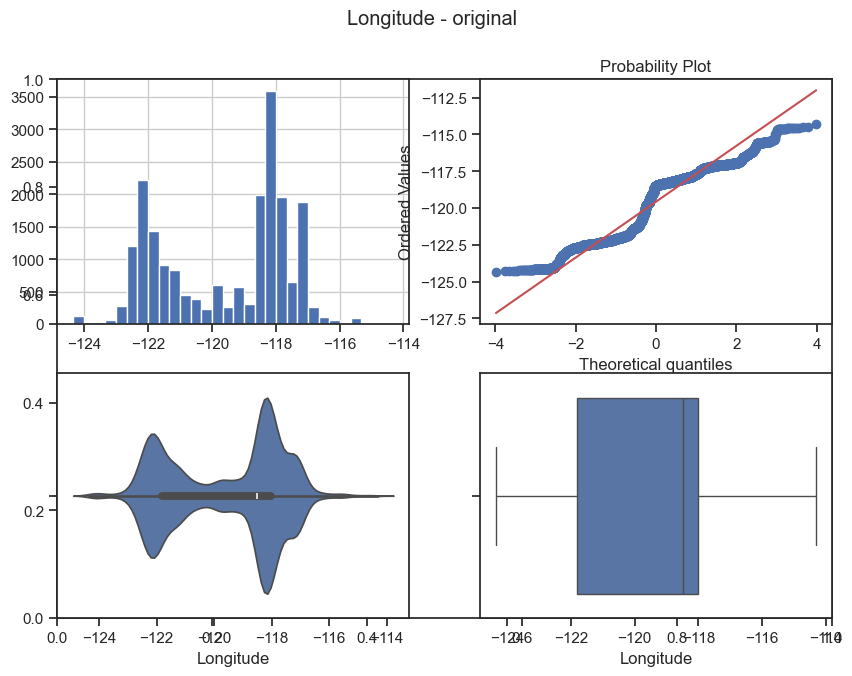

In [ ]:
diagnostic_plots(data, 'Longitude', 'Longitude - original')

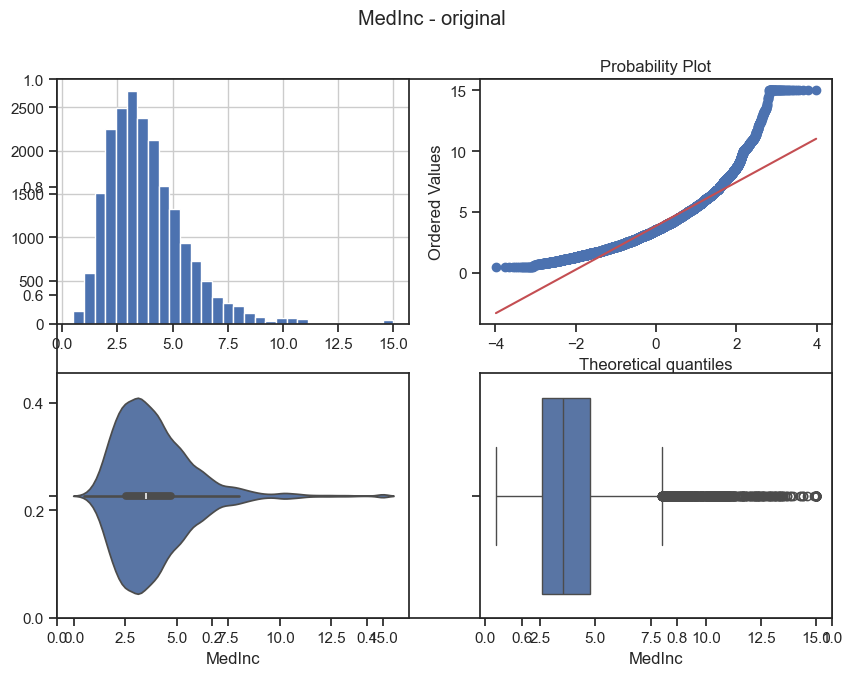

In [ ]:
diagnostic_plots(data, 'MedInc', 'MedInc - original')

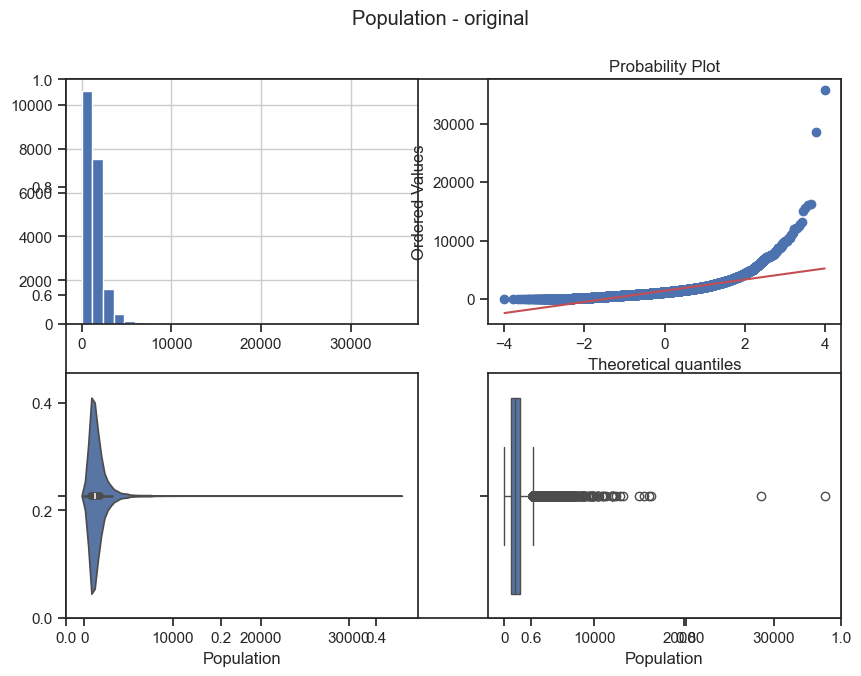

In [ ]:
diagnostic_plots(data, 'Population', 'Population - original')

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')

    return lower_boundary, upper_boundary

### Для удаления выбросов

In [ ]:
data.shape

(20640, 4)

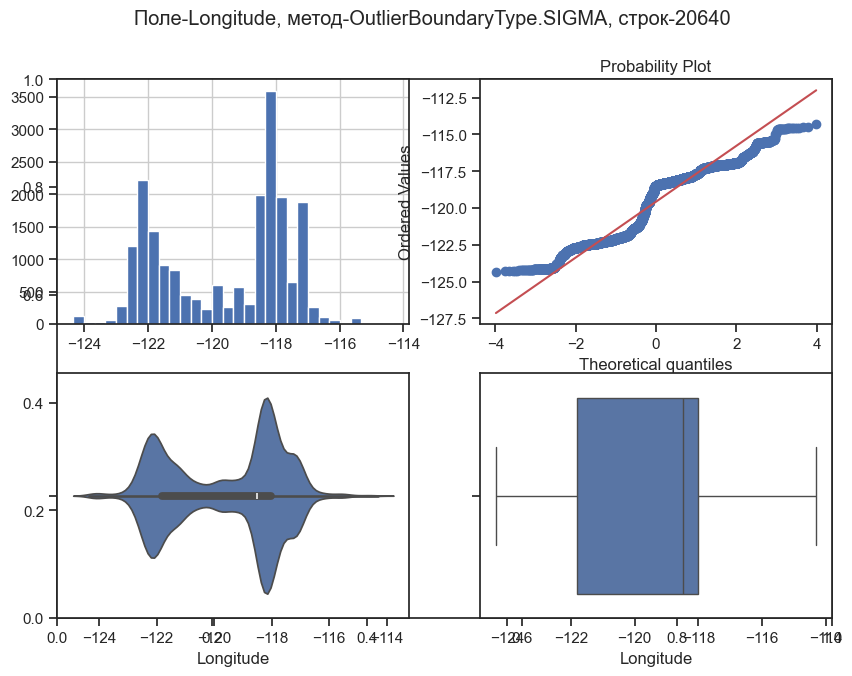

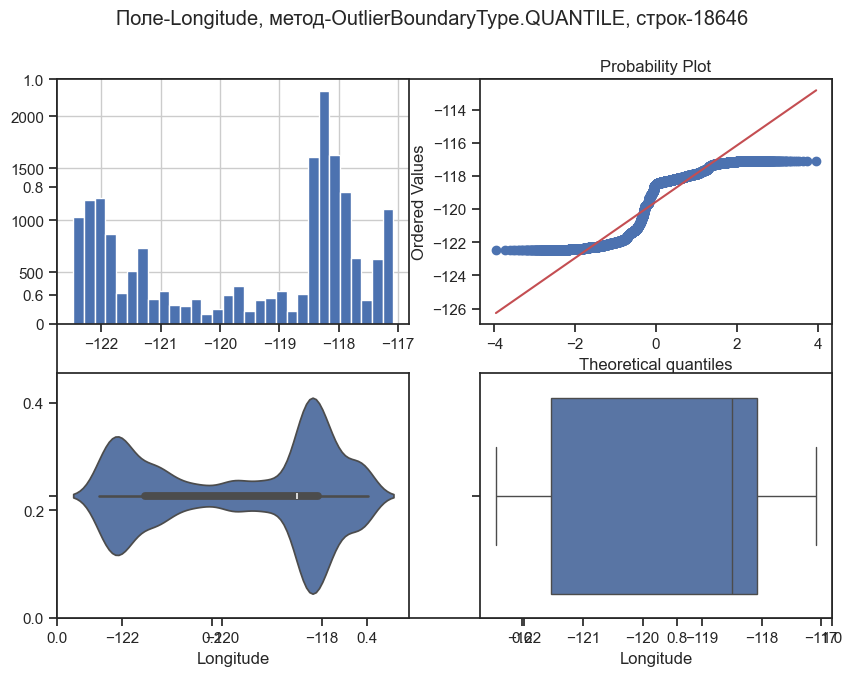

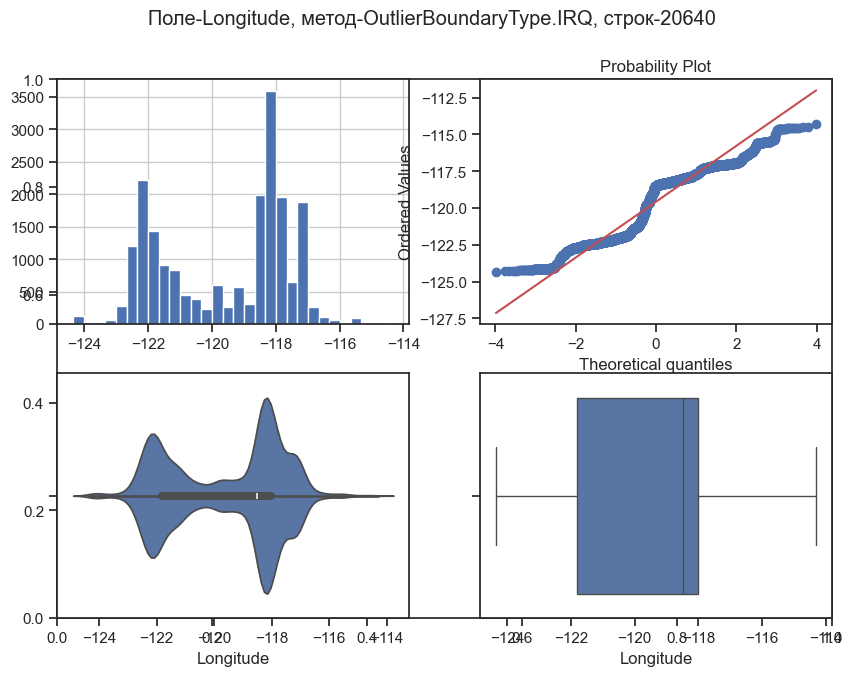

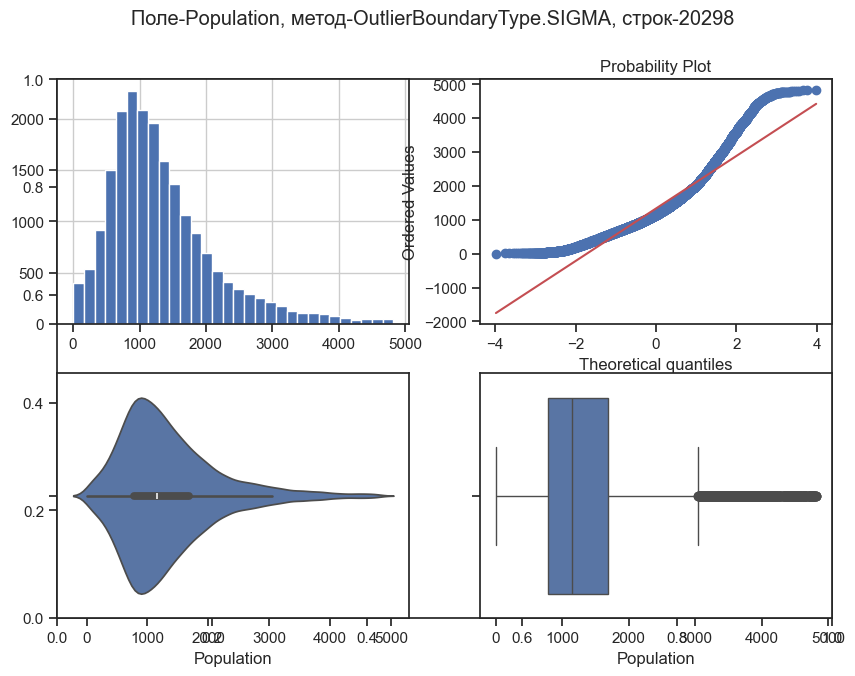

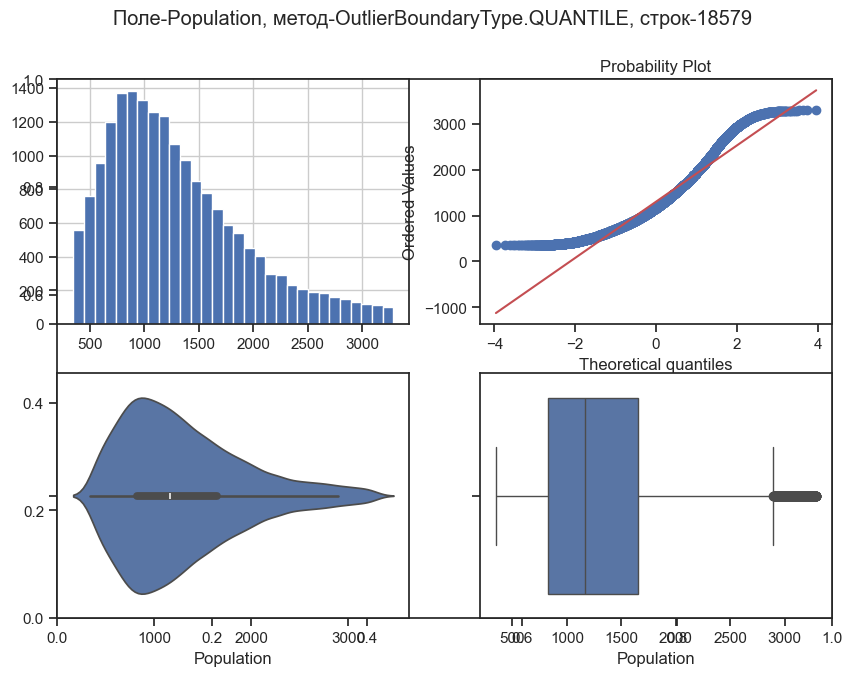

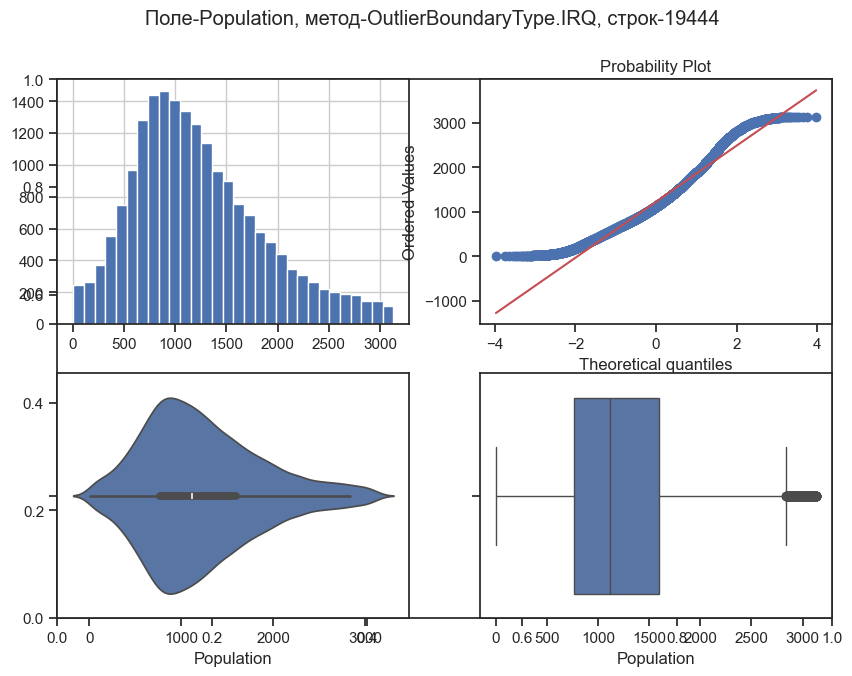

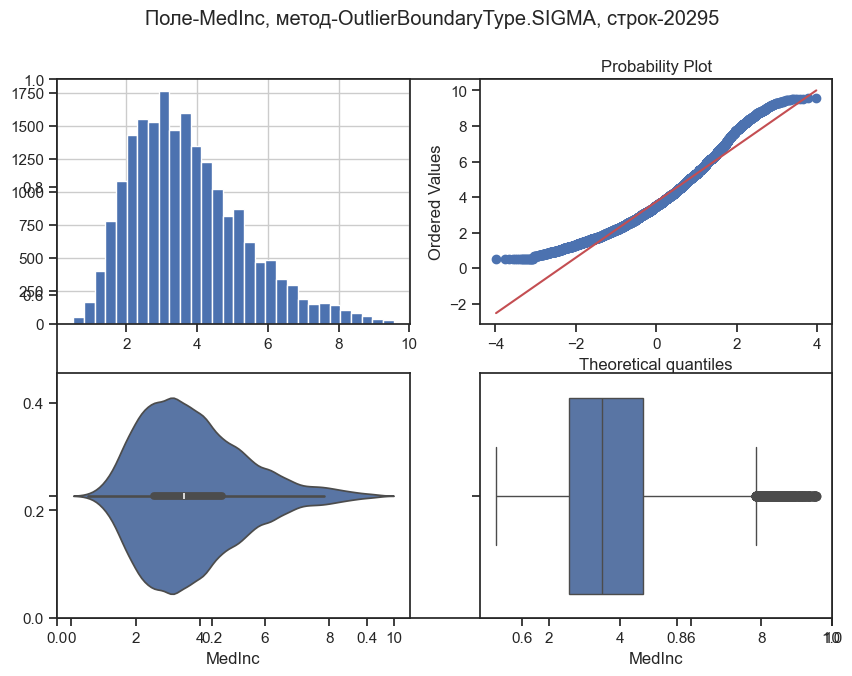

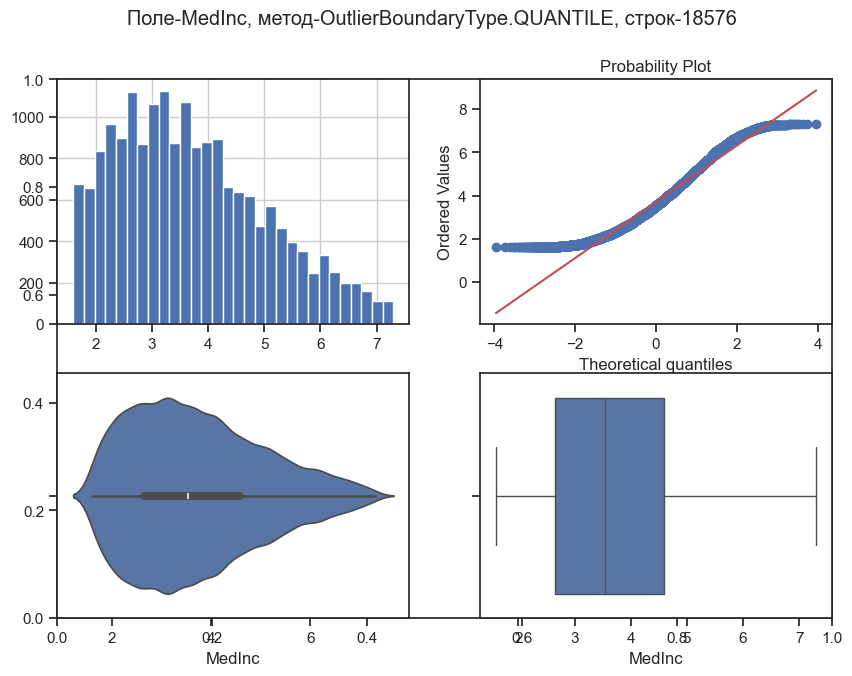

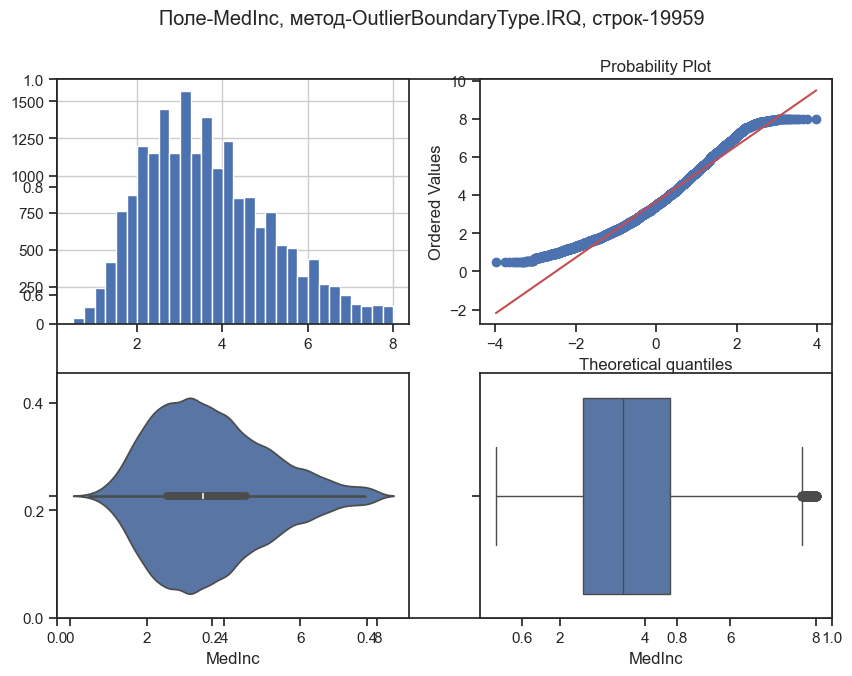

In [ ]:
for col in x_col_list:
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True,
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### Для замены выбросов

Для замены используем найденные верхнюю и нижнюю границы.

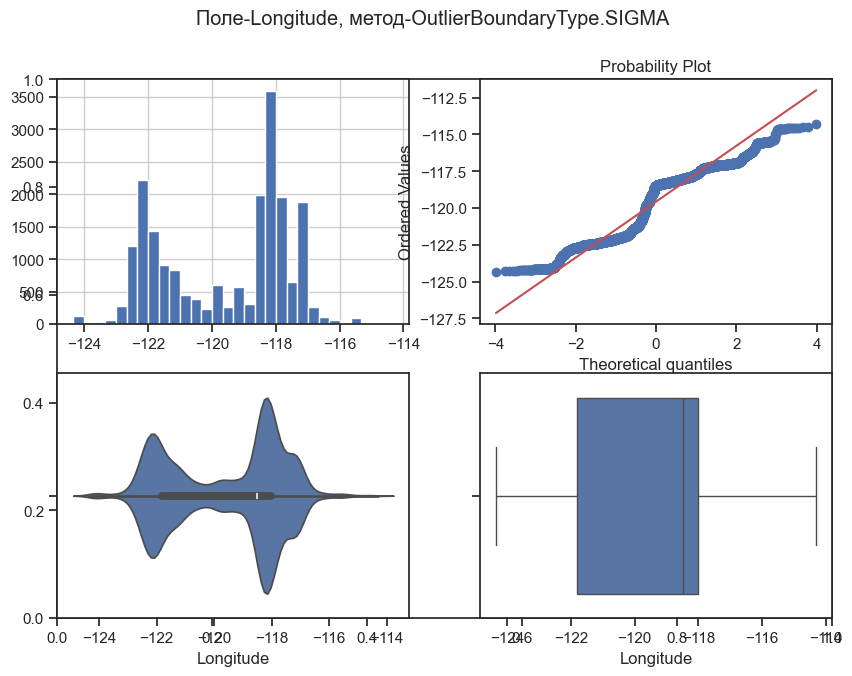

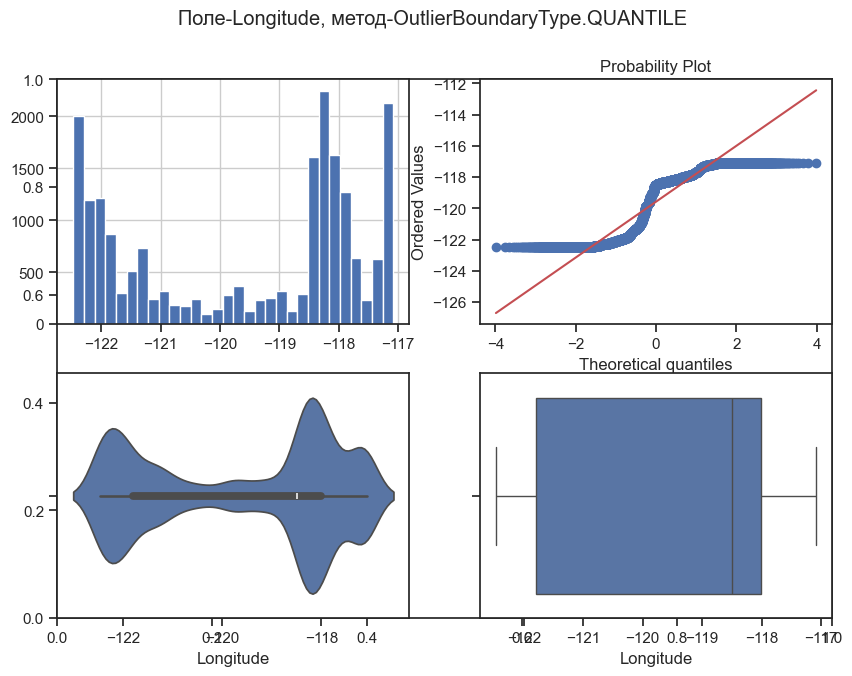

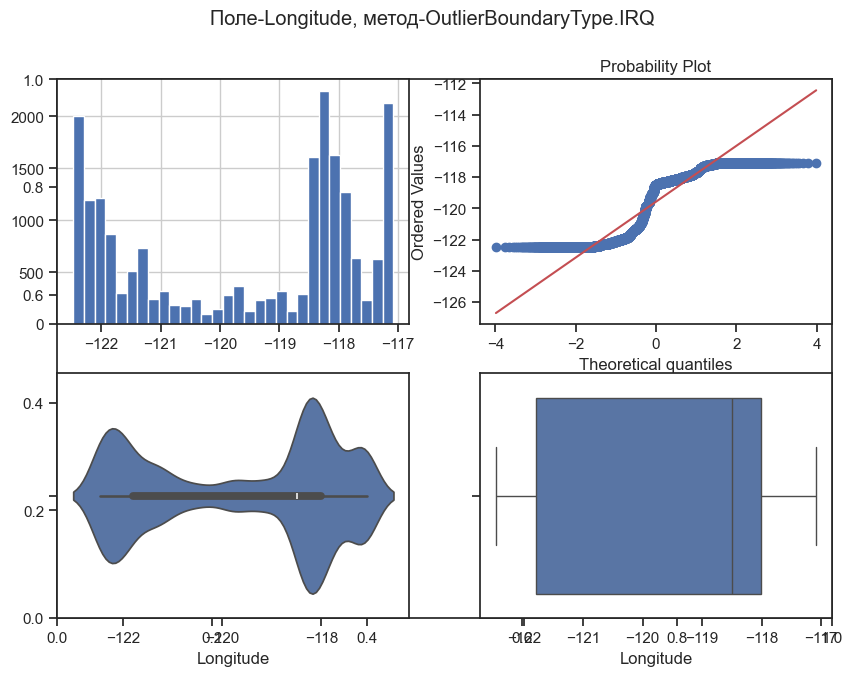

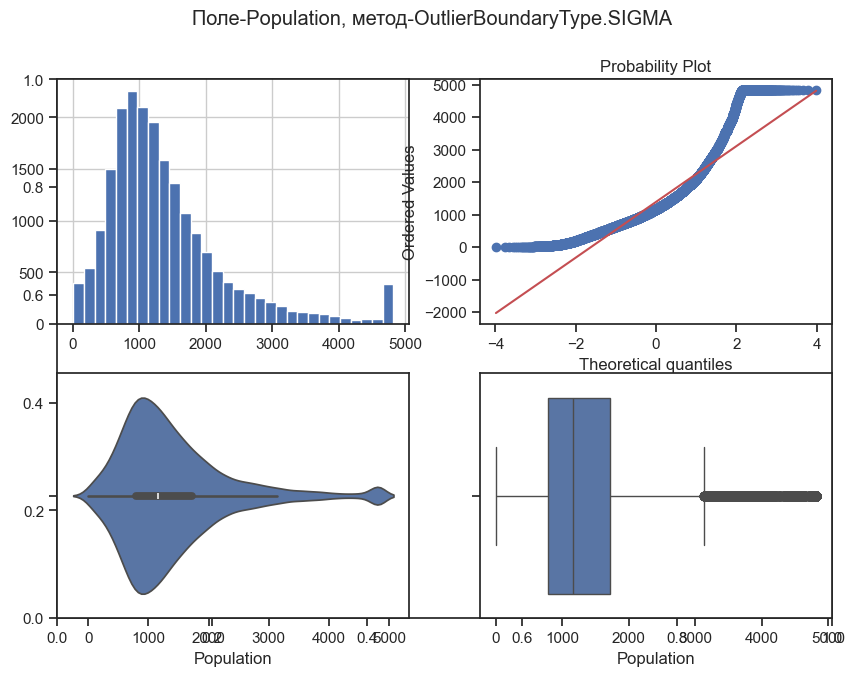

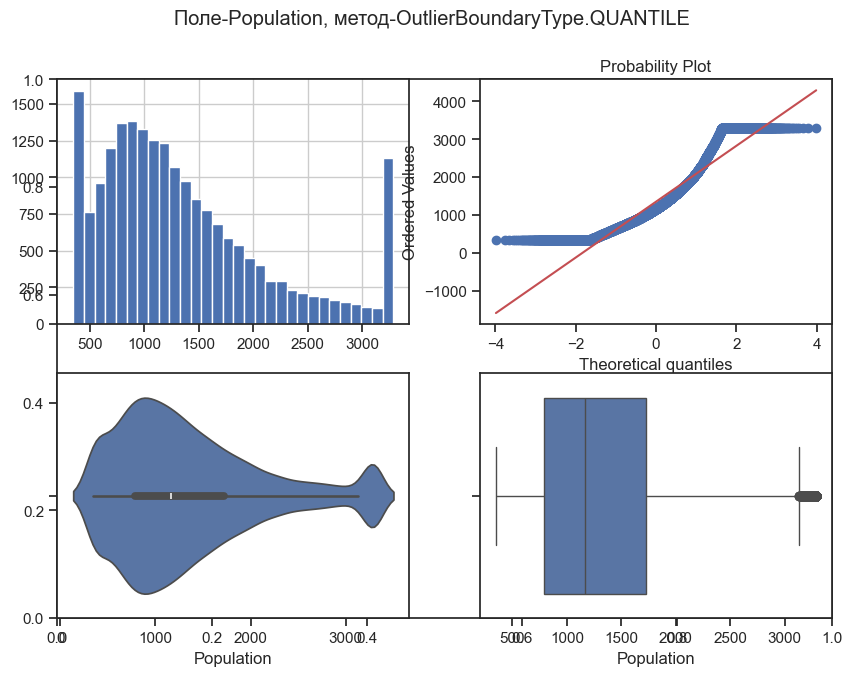

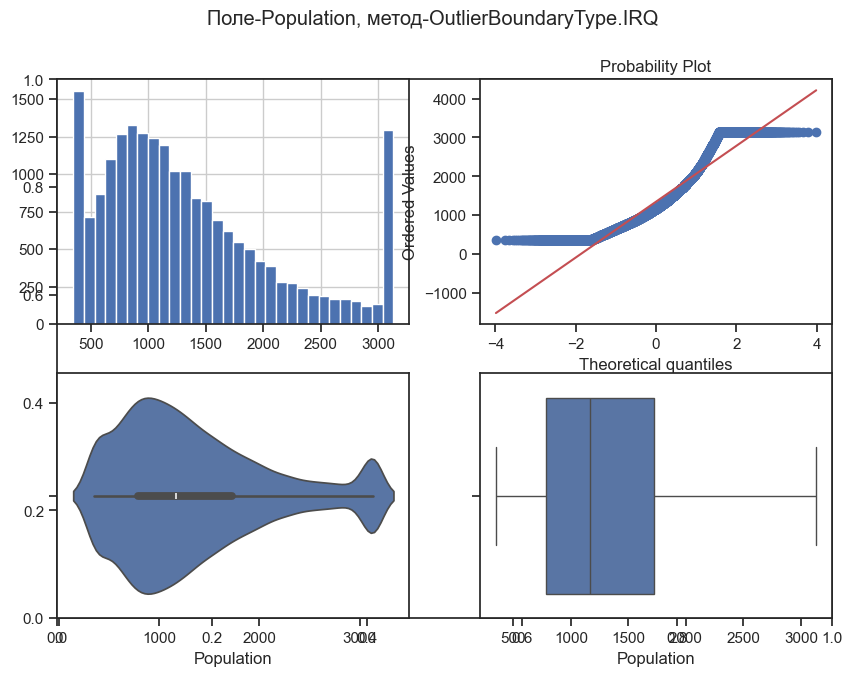

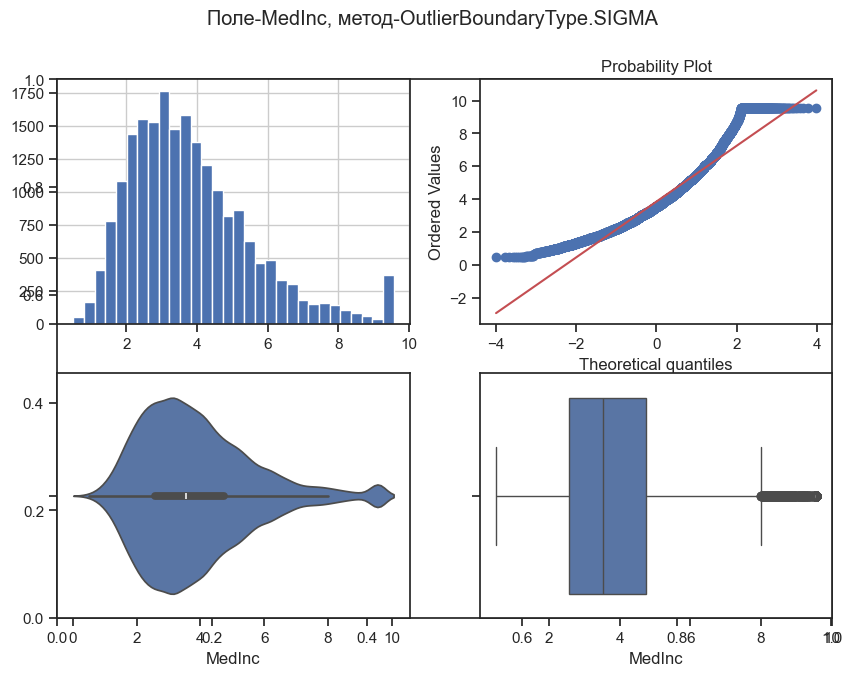

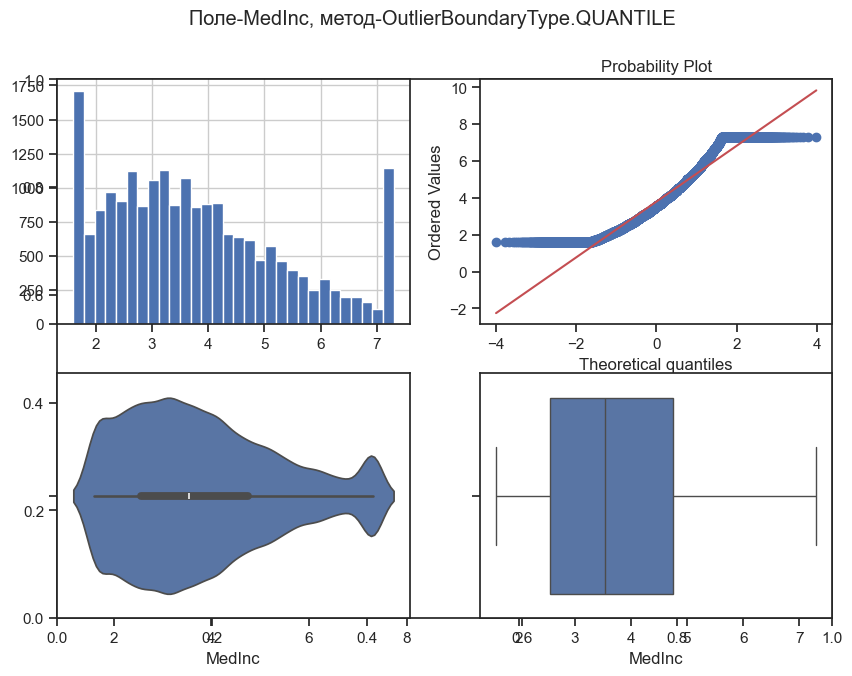

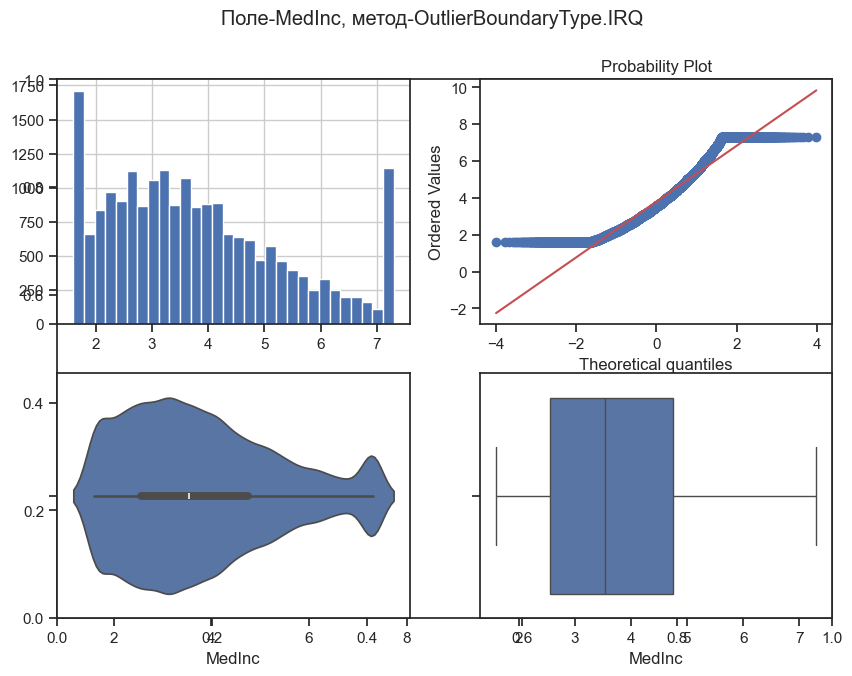

In [ ]:
for col in x_col_list:
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary,
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

## Обработка нестандартного признака
(который не является числовым или категориальным);

### Описание датасета EaseMyTrip Flight Fare Travel Listings

Обрабатывать нестандартные признаки будем для набора c ценами авиабилетов. Здесь присутствуют различные нестандартные форматы дат и времени, которые необходимо обработать.

In [5]:
# Импорт датасета
data = pd.read_csv('/content/EaseMyTrip_Flight _Fare_Travel_Listings.csv')

# Вывод первых 5 строк
data.head(5)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,53f192419756cfa95baa4745067354f5,2020-04-01 01:23:42 +0000,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,SG-8751|SG-426,23Apr2020,13:10,23Apr2020,22:00,08h 50m,1,4378.0
1,7bb845050e88cc6a4f17abf24794c73b,2020-04-01 00:59:51 +0000,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,UK-851|UK-812|UK-885,18Apr2020,07:00,18Apr2020,19:10,12h 10m,2,7465.0
2,c9a84cc24d8a350eb41555c7bb76def6,2020-04-01 00:56:35 +0000,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,AI-18|AI-401|AI-729,25Apr2020,07:10,26Apr2020,11:05,27h 55m,2,6179.0
3,0c0a87ac2229b8c3f1b322baf1fc9f4e,2020-04-01 00:42:35 +0000,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,SG-254|SG-8561,16Apr2020,18:00,17Apr2020,11:10,17h 10m,1,5226.0
4,b8f8af12fd6d9bf2f24389f26488478c,2020-04-01 01:52:13 +0000,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,6E-5321|6E-323,18Apr2020,07:25,18Apr2020,13:35,06h 10m,1,3333.0


Размер набора:

In [6]:
data.shape

(30000, 16)

Обработанный далее набор будем записывать в эту переменнную:

In [7]:
data_normal_formats = data.copy(deep=True)

### Обработка форматов столбцов

Сконвертируем дату и время для столбцов 'Departure Date', 'Arrival Date' в формат datetime, при этом объединив время и дату:

In [8]:
data_normal_formats['departure_datetime'] = data.apply(lambda x: pd.to_datetime(x['Departure Date'] + x['Departure Time'], format='%d%b%Y%H:%M'), axis=1)
data_normal_formats['arrival_datetime'] = data.apply(lambda x: pd.to_datetime(x['Arrival Date'] + x['Arrival Time'], format='%d%b%Y%H:%M'), axis=1)

In [9]:
data_normal_formats=data_normal_formats.drop(columns=['Departure Date', 'Departure Time', 'Arrival Date', 'Arrival Time'],axis=1)

Таким образом мы получаем 2 столбца в формате datetime, с которыми можно дальше удобно работать. При этом дата и время у нас теперь в одном столбце

Например, можем вычислить общее время полета:

In [10]:
datetime_diff = data_normal_formats['arrival_datetime'] - data_normal_formats['departure_datetime']

In [11]:
def calc_total_minutes(x):
  return x.total_seconds() / 60

total_minutes_col = datetime_diff.apply(calc_total_minutes)
total_minutes_col

,0
0,530.0
1,730.0
2,1675.0
3,1030.0
4,370.0
...,...
29995,525.0
29996,785.0
29997,1510.0
29998,1940.0


Вычисленный столбец аналогичен столбцу Total Time из нашего набора. Выходит, мы провели вычисления верно.

Также сконвентируем столбец 'Crawl Timestamp' в формат datetime:

In [12]:
data_normal_formats['Crawl Timestamp'] = data.apply(lambda x: pd.to_datetime(x['Crawl Timestamp'], format='%Y-%m-%d %H:%M:%S %z'), axis=1)

Столбец 'Total Time' переведем в минуты:

In [14]:
def total_time_to_minutes(val):
  hours, minutes = re.findall(r"\d+", val)
  return (int(hours) * 60 + int(minutes))

data_normal_formats['Total Time'] = data.apply(lambda x: total_time_to_minutes(x['Total Time']), axis=1)

In [15]:
data_normal_formats.head()

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Total Time,Number Of Stops,Fare,departure_datetime,arrival_datetime
0,53f192419756cfa95baa4745067354f5,2020-04-01 01:23:42+00:00,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,SG-8751|SG-426,530,1,4378.0,2020-04-23 13:10:00,2020-04-23 22:00:00
1,7bb845050e88cc6a4f17abf24794c73b,2020-04-01 00:59:51+00:00,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,UK-851|UK-812|UK-885,730,2,7465.0,2020-04-18 07:00:00,2020-04-18 19:10:00
2,c9a84cc24d8a350eb41555c7bb76def6,2020-04-01 00:56:35+00:00,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,AI-18|AI-401|AI-729,1675,2,6179.0,2020-04-25 07:10:00,2020-04-26 11:05:00
3,0c0a87ac2229b8c3f1b322baf1fc9f4e,2020-04-01 00:42:35+00:00,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,SG-254|SG-8561,1030,1,5226.0,2020-04-16 18:00:00,2020-04-17 11:10:00
4,b8f8af12fd6d9bf2f24389f26488478c,2020-04-01 01:52:13+00:00,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,6E-5321|6E-323,370,1,3333.0,2020-04-18 07:25:00,2020-04-18 13:35:00


## Отбор признаков:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

In [ ]:
california_ds = _california_housing.fetch_california_housing()
data = pd.DataFrame(california_ds.data,
                      columns=california_ds.feature_names)
data['Y'] = california_ds.target
data.shape

(20640, 9)

### Метод из группы методов фильтрации (filter methods)

- Методы выбирают наиболее "подходящие" признаки без использования моделей машинного обучения на основе статистических характеристик выборки (корреляция и т.д.)
- Наименее затратны с точки зрения вычислительных ресурсов.
- Могут уступать другим методам по качеству отбора признаков, потому что не учитывают зависимости между признаками.
- Хорошо подходят для начальной фильтрации признаков.

### Методы, основанные на корреляции

- Желательно, чтобы признаки хорошо коррелировали с целевым признаком.
- Важно, чтобы признаки не коррелировали между собой.

<Axes: >

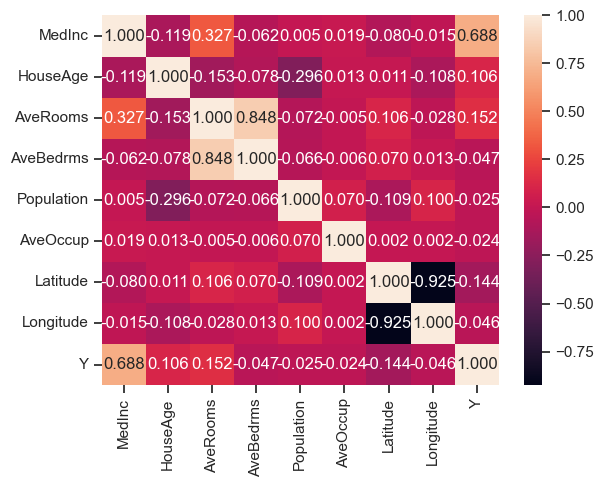

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [ ]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack()
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [ ]:
make_corr_df(data)

,f1,f2,corr
0,Longitude,Latitude,0.924664
1,Latitude,Longitude,0.924664
2,AveRooms,AveBedrms,0.847621
3,AveBedrms,AveRooms,0.847621


In [ ]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Latitude', 'Longitude'], ['AveBedrms', 'AveRooms']]

### Метод из группы методов обертывания (wrapper methods)

- Используют модели машинного обучения для отбора признаков.
- Формируют подмножества признаков.
- Для каждого подмножества признаков строится отдельная модель машинного обучения.
- Для конкретной модели машинного обучения (на которой производится оценка) чаще всего генерируют оптимальный набор признаков. (Но этот набор не обобщается на все модели.)
- Очень затратны с точки зрения вычислительных ресурсов.
- Могут приводить к переобучению моделей (особенно в случае маленьких выборок).

#### Алгоритмы полного перебора

- Осуществляют перебор всех комбинаций из 1, 2, ... N признаков.
- Для каждой комбинации строится модель и оценивается метрика качества.
- Выбирается лучшая модель на основе метрики.
- По сравнению с предыдущими двумя подходами, данный подход наиболее требователен к ресурсам.

Для решения задачи используется класс [ExhaustiveFeatureSelector](http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/) из библиотеки MLxtend.

Параметры min_features и max_features используются для задания диапазона количества перебираемых признаков.

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.datasets import load_diabetes

knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
efs1 = EFS(knn,
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

diabets = load_diabetes()
diabets_x = diabets.data
diabets_y = diabets.target
diabets_feature_names = diabets['feature_names']
diabets_x_df = pd.DataFrame(data=diabets['data'], columns=diabets['feature_names'])


efs1 = efs1.fit(diabets_x, diabets_y)


print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\sklearn\model_selection\_valida

Best accuracy score: 0.02
Best subset (indices): (0, 1, 4, 6)
Best subset (corresponding names): ('0', '1', '4', '6')


### Метод из группы методов вложений (embedded methods)

- Являются гибридом фильтрации и обертывания.
- Осуществляют отбор признаков на основе оценки важности признаков в процессе конструирования модели.
- По сравнению с методами обертывания, менее затратны с точки зрения вычислительных ресурсов.

#### Использование линейных моделей

In [ ]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(diabets_x, diabets_y)
# Коэффициенты регрессии
e_lr1.coef_

c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[ 3.59674720e+00, -4.57841723e+01, -3.60920124e-01, ...,
        -4.55458434e+01,  2.70474898e+01, -1.31482645e+01],
       [ 9.87769163e+01, -7.27638225e+01, -1.13728539e+00, ...,
        -4.65985286e+02, -1.91943796e+02,  0.00000000e+00],
       [ 5.91685466e+01, -6.39101830e+01, -1.61273486e+02, ...,
         0.00000000e+00, -3.49347601e+01, -4.89011437e+01],
       ...,
       [ 5.40540965e+01,  4.12790995e+01,  2.03521201e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.09520878e+02],
       [ 0.00000000e+00,  0.00000000e+00,  4.99210349e+01, ...,
         1.00619378e+02, -3.43526050e+01,  0.00000000e+00],
       [-3.28855574e+00, -4.74442541e+01,  1.16773221e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
# Все 4 признака являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(diabets_x, diabets_y)
sel_e_lr1.get_support()

c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])